##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [1]:
%pip install ipykernel
%pip install pandas 
%pip install numpy
%pip install pyarrow
%pip install fastparquet
%pip install matplotlib
%pip install scikit-learn
%pip install imbalanced-learn
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/667.9 kB ? eta -:--:--
   --------------------------------------- 667.9/667.9 kB 21.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 33.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/169.0 kB ? eta -:--:--
   --------------------------------------- 169.0/169.0 kB 10.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [1]:
# Can have as many cells as you want for code
import pandas as pd
import matplotlib.pyplot as plt

# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file
filepath = "./data/catB_train.parquet" 

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

`clntnum`: Unique identifier for the client.

`race_desc`: Description of the client's race.

`ctrycode_desc`: Country code indicating the client's location.

`clttype`: Customer status.

`stat_flag`: Flag indicating ACTIVE, LAPSED or MATURED. E.g. if there’s at least one inforce policy, then the flag would be ACTIVE. If all of the client’s policies are all lapsed, then it is LAPSED.

`min_occ_date`: Date of the client's first interaction or policy purchase with the company.

`cltdob_fix`: Fixed or corrected date of birth of the client.

`cltsex_fix`: Fixed or corrected gender of the client.

In [4]:
###...code...###
test_df = pd.read_parquet(filepath)

# drop these columns
to_drop = []
for i in range(len(test_df.columns)):
    # if column has only 1 unique value, that column is unimportant as a feature
    if len(test_df[test_df.columns[i]].unique()) == 1:
        #print(len(test_df[test_df.columns[i]].unique()))
        to_drop.append(i)

dropped_df = test_df.drop(test_df.columns[to_drop], axis=1)
dropped_df.head()

,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,...,recency_hlthclaim_success,hlthclaim_cnt_unsuccess,recency_hlthclaim_unsuccess,flg_hlthclaim_839f8a_ever,recency_hlthclaim_839f8a,flg_hlthclaim_14cb37_ever,recency_hlthclaim_14cb37,giclaim_amt,recency_giclaim,f_purchase_lh
19550,91b546e924,Chinese,Singapore,P,ACTIVE,2017-10-31,1974-05-09,Female,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
4600,896bae548c,Chinese,Singapore,P,ACTIVE,2007-05-23,1979-11-11,Male,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
13337,f364439ae6,Others,Singapore,P,ACTIVE,2019-08-31,1976-01-28,Male,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
15074,70f319cfe1,Chinese,Singapore,P,ACTIVE,2021-10-18,1976-03-19,Female,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
19724,2647a81328,Chinese,Singapore,P,ACTIVE,2018-07-20,1995-07-31,Female,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN


In [62]:
# By Race
print(dropped_df.groupby('race_desc').count()['clntnum'])
print()

print(dropped_df.groupby('race_desc').agg({"f_purchase_lh": 'count'}))
print()

print(f'Chinese: {521/10520*100}')
print(f'Indian: {11/849 *100}')
print(f'Malay: {21/928 *100}')
print(f'Others: {112/1699 *100}')

race_desc
Chinese    10520
Indian       849
Malay        928
Others      1699
Name: clntnum, dtype: int64

           f_purchase_lh
race_desc               
Chinese              521
Indian                11
Malay                 21
Others               112

Chinese: 4.952471482889734
Indian: 1.2956419316843346
Malay: 2.2629310344827585
Others: 6.59211300765156


In [63]:
# By country
# only singaporeans are likely to buy insurance
dropped_df.groupby('ctrycode_desc').agg({"f_purchase_lh": 'count'}).sort_values(by='f_purchase_lh', ascending=False).iloc[:5]

,f_purchase_lh
ctrycode_desc,
Singapore,710
Australia,0
Bosnia-Herzegovina,0
United States,0
United Kingdom,0


In [69]:
# By clttype
print(dropped_df.groupby('clttype').count()['clntnum'])
print()

print(dropped_df.groupby('clttype').agg({"f_purchase_lh": 'count'}))
print()

print(f'C type: {2/24*100}')
print(f'G type: {36/3311 *100}')
print(f'P type: {672/14657 *100}')


clttype
C       24
G     3311
P    14657
Name: clntnum, dtype: int64

         f_purchase_lh
clttype               
C                    2
G                   36
P                  672

C type: 8.333333333333332
G type: 1.0872848082150408
P type: 4.584840008187214


In [65]:
# By stat_flag
print(dropped_df.groupby('stat_flag').count()['clntnum'])
print()

print(dropped_df.groupby('stat_flag').agg({"f_purchase_lh": 'count'}))
print()

print(f'Active: {694/17205 *100}')
print(f'Lapsed: {16/775 *100}')

stat_flag
ACTIVE     17205
LAPSED       775
MATURED       12
Name: clntnum, dtype: int64

           f_purchase_lh
stat_flag               
ACTIVE               694
LAPSED                16
MATURED                0

Active: 4.033711130485324
Lapsed: 2.064516129032258


In [66]:
# by min_occ_year
new_df = dropped_df
new_df['min_occ_year'] = dropped_df['min_occ_date'].str.slice(stop=4) 

print(new_df.groupby('min_occ_year').count()['clntnum'])
print()

print(new_df.groupby('min_occ_year').agg({"f_purchase_lh": 'count'}))

min_occ_year
1954       1
1959       1
1962       1
1968       1
1971       1
1972       2
1974       4
1975       2
1977       4
1978       1
1979       5
1980       3
1981       1
1982       4
1983      13
1984       6
1985       8
1986      12
1987      12
1988      31
1989      24
1990      37
1991      46
1992      38
1993      38
1994      44
1995      42
1996      41
1997      29
1998      46
1999      25
2000      54
2001      98
2002     168
2003     218
2004     247
2005     407
2006     486
2007     394
2008     634
2009     597
2010     665
2011     739
2012     715
2013     721
2014     787
2015    1109
2016    1149
2017     803
2018     948
2019     898
2020    1301
2021     864
2022    1442
2023    2015
None      10
Name: clntnum, dtype: int64

              f_purchase_lh
min_occ_year               
1954                      0
1959                      0
1962                      0
1968                      0
1971                      0
1972                      0
1974  

In [67]:
# by cltdob_fix
new_df['cltdob_fix_year'] = dropped_df['cltdob_fix'].str.slice(stop=4) 

# print(new_df.groupby('cltdob_fix_year').count()['clntnum'])
# print()

new_df.groupby('cltdob_fix_year').agg({"f_purchase_lh": 'count'}).sort_values('f_purchase_lh', ascending=False)


,f_purchase_lh
cltdob_fix_year,
1990,40
1989,36
1993,30
1991,30
1983,25
...,...
1945,0
1946,0
1947,0


In [68]:
# By Gender
print(dropped_df.groupby('cltsex_fix').count()['clntnum'])
print()

print(dropped_df.groupby('cltsex_fix').agg({"f_purchase_lh": 'count'}))
print()

print(f'Female: {345/8196 *100}')
print(f'Male: {363/9773 *100}')

cltsex_fix
Female    8196
Male      9773
Name: clntnum, dtype: int64

            f_purchase_lh
cltsex_fix               
Female                345
Male                  363

Female: 4.209370424597365
Male: 3.714314949350251


### Balancing target column

Text(0.5, 1.0, 'Distribution of target column')

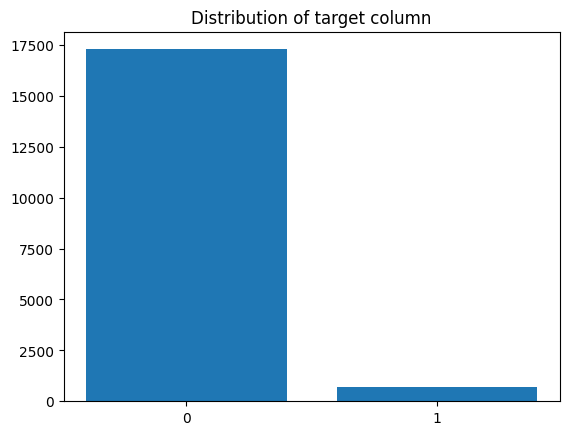

In [5]:
#check if dataset is imbalanced
dropped_df["f_purchase_lh"] = dropped_df["f_purchase_lh"].fillna(0)

plt.bar(x = ('0','1'),
        height = ((dropped_df['f_purchase_lh']==0).sum(),
                  (dropped_df['f_purchase_lh']==1).sum()))
plt.title('Distribution of target column')


#### Handling NA values

In [49]:
def handle_na(df):
    # Dropping columns where na values take up 65% of the column
    df_temp = dropped_df.dropna(thresh = dropped_df.shape[0]*0.35, axis = 1).copy()

    # Try casting categorical columns to numeric to reduce encoding
    non_numeric_cols = df_temp.select_dtypes(include=["object"]).columns
    for i in range(len(non_numeric_cols)):
        try:
            df_temp[non_numeric_cols[i]] = pd.to_numeric(df_temp[non_numeric_cols[i]])
        except ValueError:
            continue
    non_numeric_cols = df_temp.select_dtypes(include=["object"]).columns

    # Extract year from columns containing dates
    df_temp['cltdob_fix'] = df_temp['cltdob_fix'].str[:4]
    df_temp['min_occ_date'] = df_temp['min_occ_date'].str[:4]

    # Fill NA values for categorical columns with 'Missing'
    df_temp[non_numeric_cols] = df_temp[non_numeric_cols].fillna('Missing')

    # Fill NA values for numerical columns with mean. For binary columns, mode is used
    numeric_cols_with_na = df_temp.select_dtypes(include=["int64", "float64"]).columns[df_temp.select_dtypes(include=["int64", "float64"]).isna().any()].tolist()
    
    for i in numeric_cols_with_na:
        if len(df_temp[i].unique()) <= 3:
            df_temp[i] = df_temp[i].fillna(df_temp[i].mode()[0])
        else:
            df_temp[i] = df_temp[i].fillna(df_temp[i].mean())
    return df_temp


In [51]:
df_temp = handle_na(dropped_df)

#### One hot encoding

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

#clntnum is dropped since it is only a unique identifier
X = df_temp.drop(['f_purchase_lh','clntnum'], axis=1)
y = df_temp['f_purchase_lh']

non_numeric_cols = X.select_dtypes(include=["object"]).columns
oh_encoder = OneHotEncoder()
transformer = make_column_transformer((oh_encoder, non_numeric_cols), remainder = 'passthrough')
encoded_df = pd.DataFrame(transformer.fit_transform(X))

print(encoded_df.shape)

(17992, 355)


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, test_size=0.3, random_state=0)

#### Oversampling

In [54]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [55]:
print('Count of target column (training)')
print(f'0: {(y_train==0).sum()}\n1: {(y_train==1).sum()}')

print('Distribution of target column after oversampling (training)')
print(f'0: {(y_train_ros==0).sum()}\n1: {(y_train_ros==1).sum()}')

Count of target column (training)
0: 12087
1: 507
Distribution of target column after oversampling (training)
0: 12087
1: 12087


#### ADASYN

In [56]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state = 0)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

### Decision Tree testing

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

dt_ros = DecisionTreeClassifier(max_depth = 5, random_state=0)
dt_ros.fit(X_train_ros, y_train_ros)
y_pred = dt_ros.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Confusion Matrix:
 [[4752  443]
 [ 122   81]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      5195
         1.0       0.15      0.40      0.22       203

    accuracy                           0.90      5398
   macro avg       0.56      0.66      0.58      5398
weighted avg       0.94      0.90      0.92      5398



In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

dt_adasyn = DecisionTreeClassifier(max_depth = 8, random_state=0)
dt_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred = dt_adasyn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[4961  234]
 [ 134   69]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      5195
         1.0       0.23      0.34      0.27       203

    accuracy                           0.93      5398
   macro avg       0.60      0.65      0.62      5398
weighted avg       0.95      0.93      0.94      5398



In [83]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator = dt_adasyn, cv = 5, scoring='f1')
X_train_rfecv = rfecv.fit(X_train_adasyn, y_train_adasyn)

# Number of features to select based on cross-validation
num_features_selected = rfecv.n_features_
print("Number of features selected:", num_features_selected)

KeyboardInterrupt: 

In [ ]:
y_pred = rfecv.predict(X_test)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      5195
         1.0       0.21      0.37      0.27       203

    accuracy                           0.92      5398
   macro avg       0.59      0.66      0.61      5398
weighted avg       0.95      0.92      0.93      5398



## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [76]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''
    result = [] 
    return result

##### Cell to check testing_hidden_data function

In [77]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=["f_purchase_lh"])
print(testing_hidden_data(test_df))

[]


### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!